In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   in

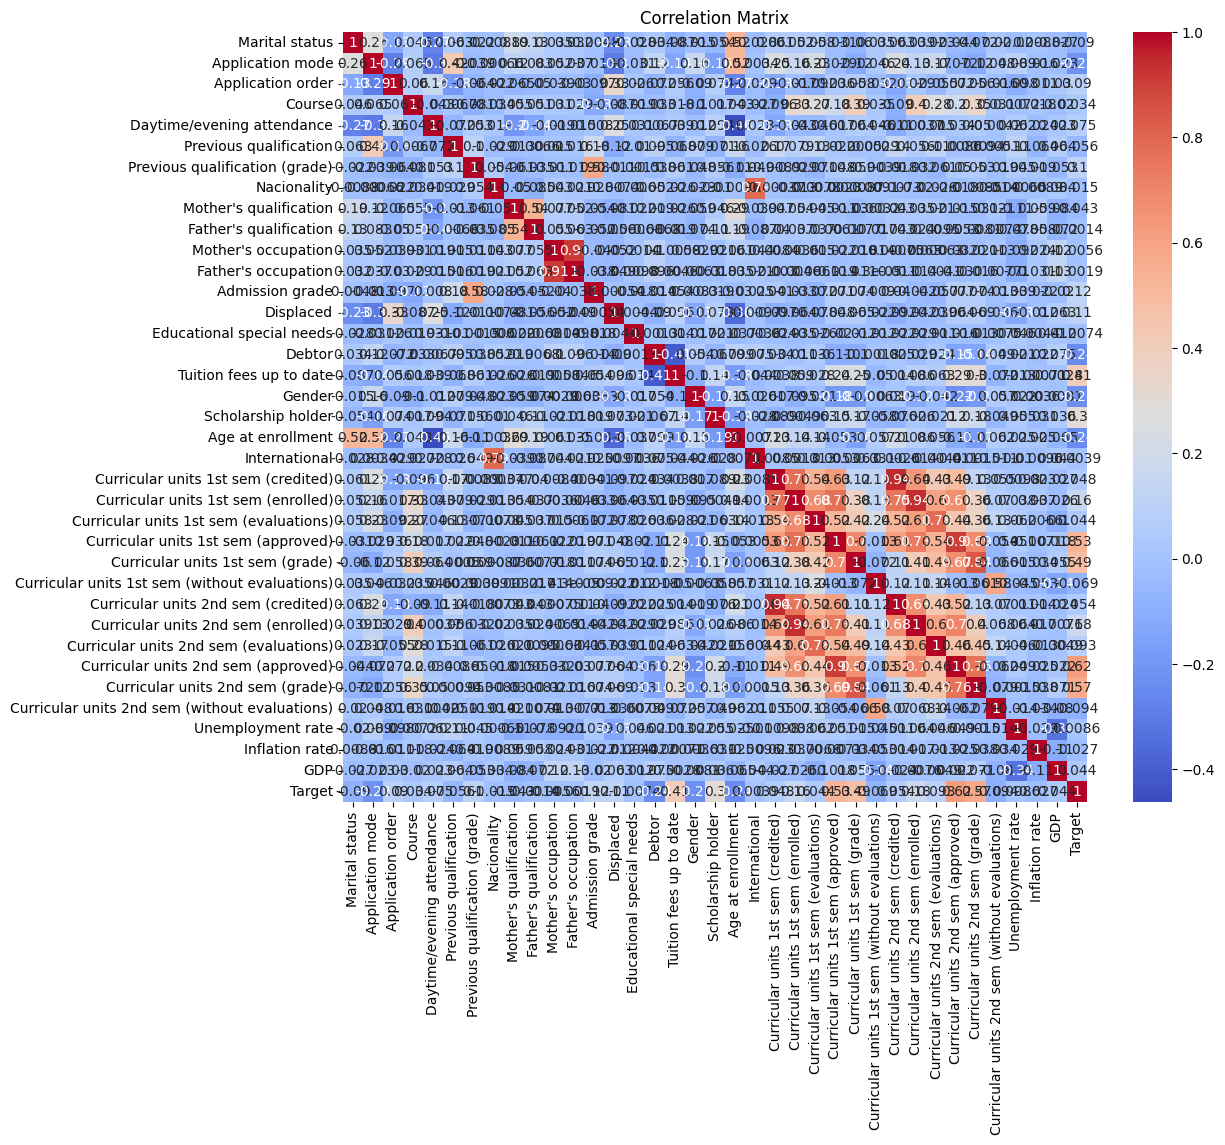

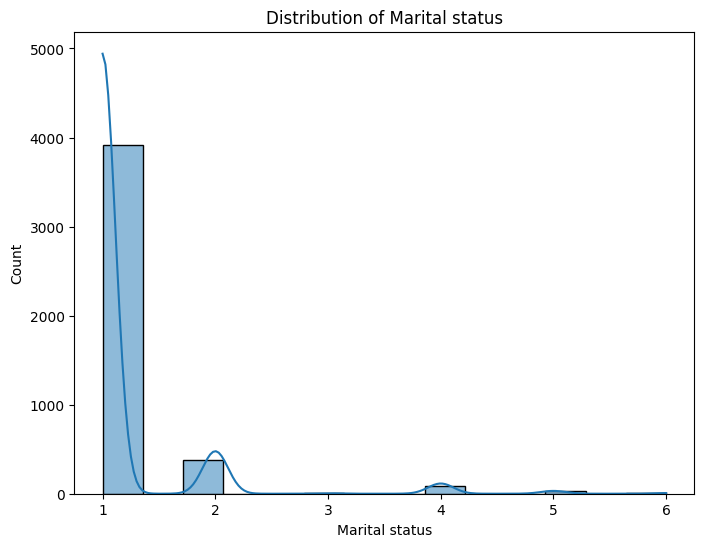

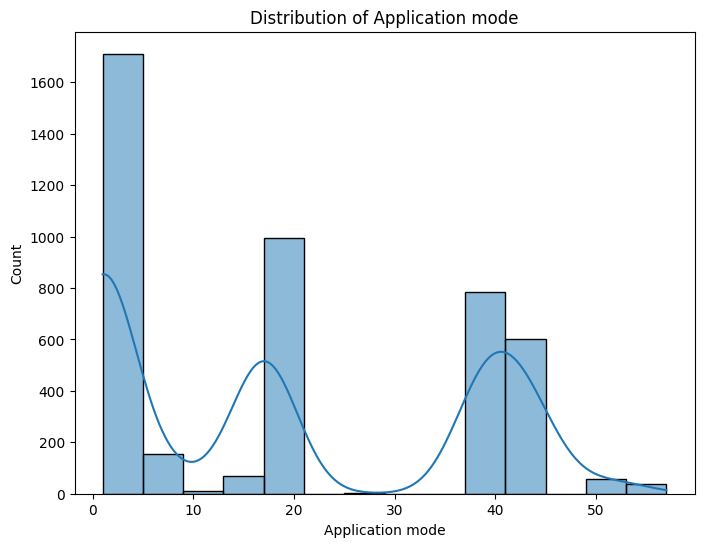

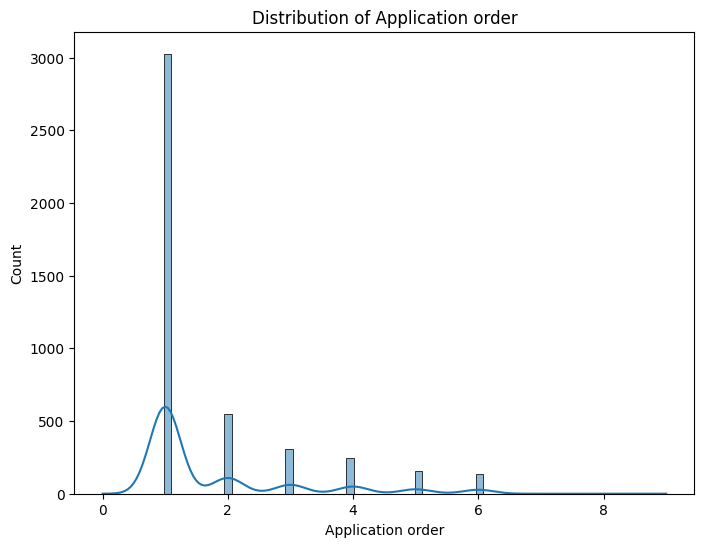

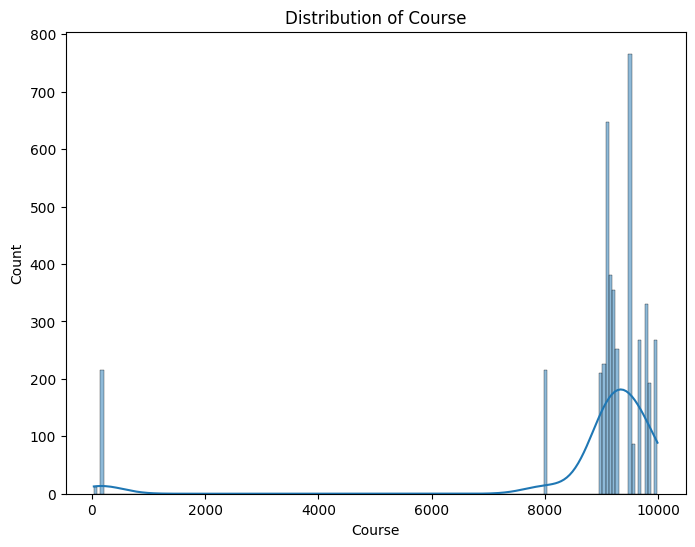

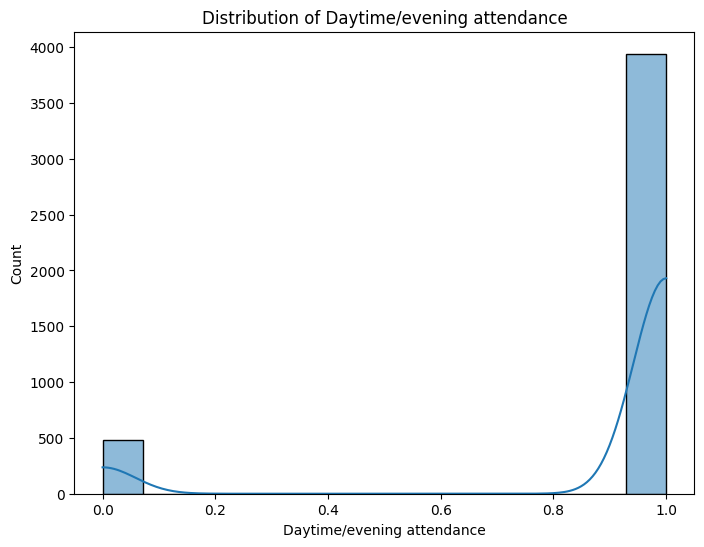

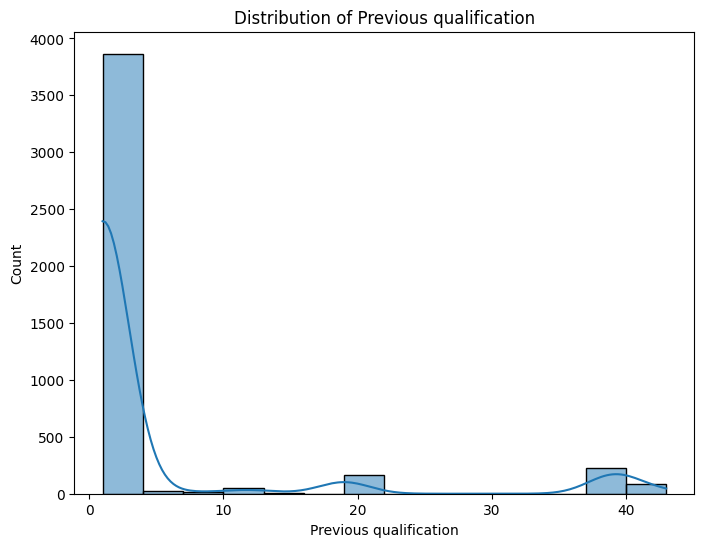

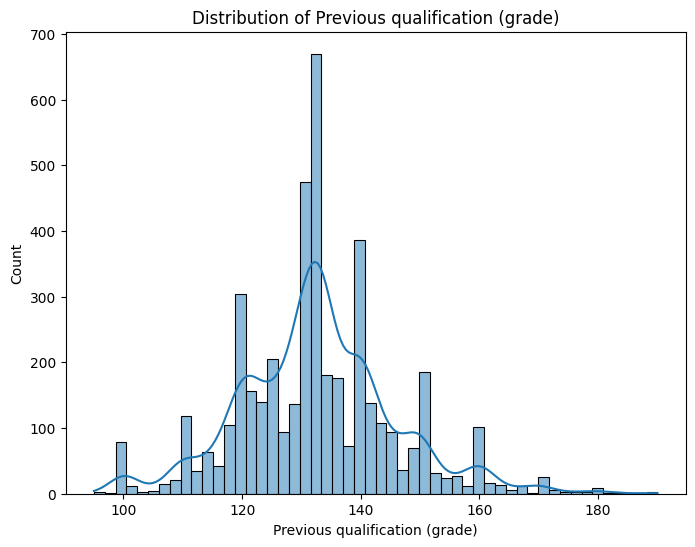

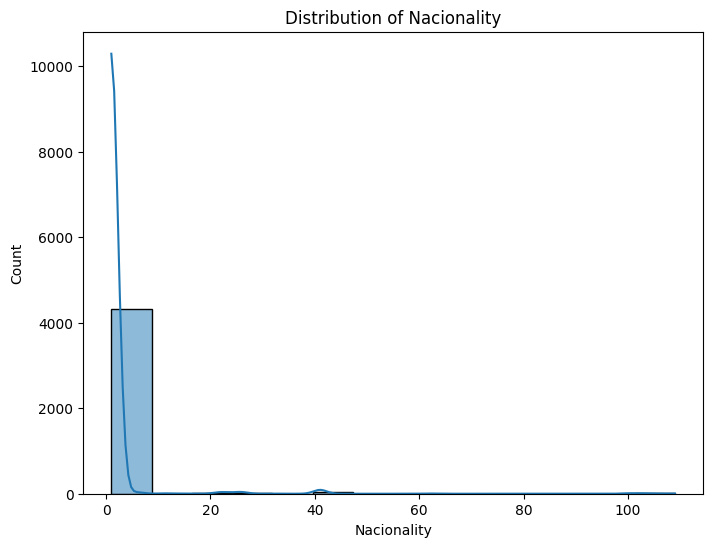

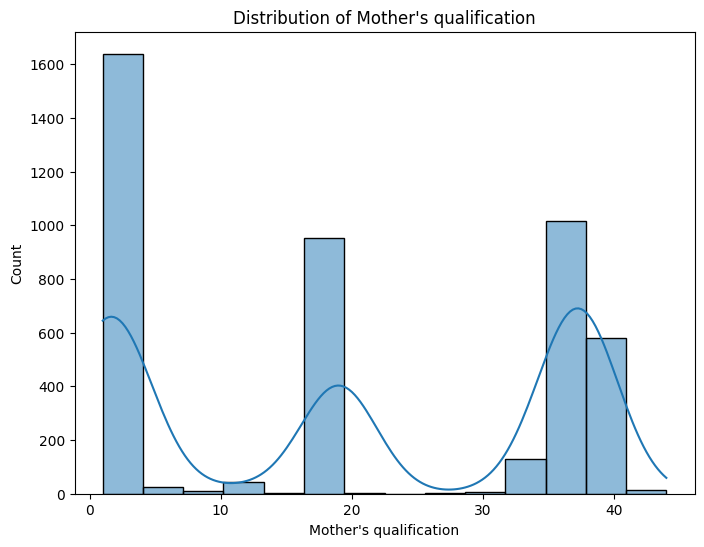

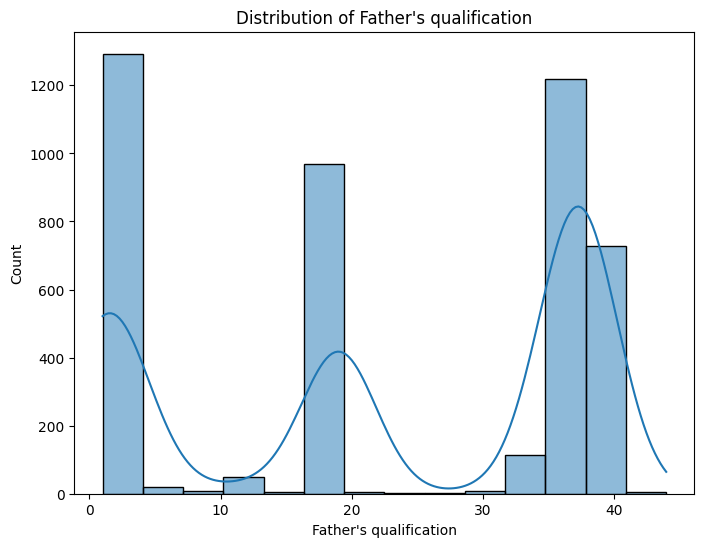

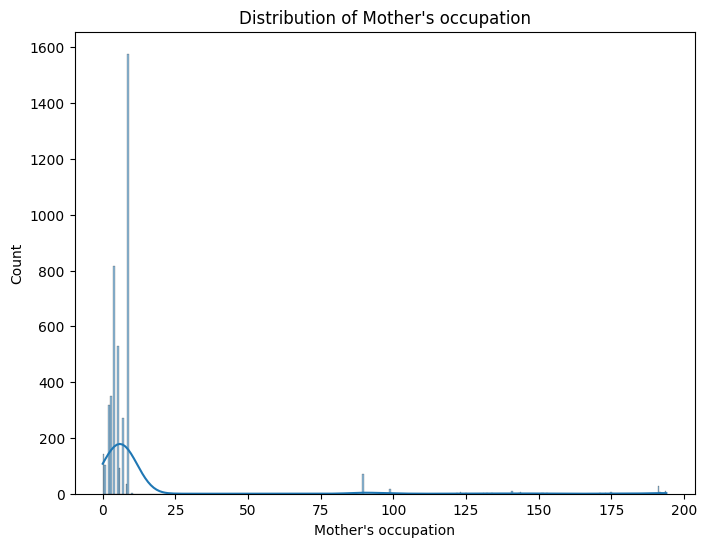

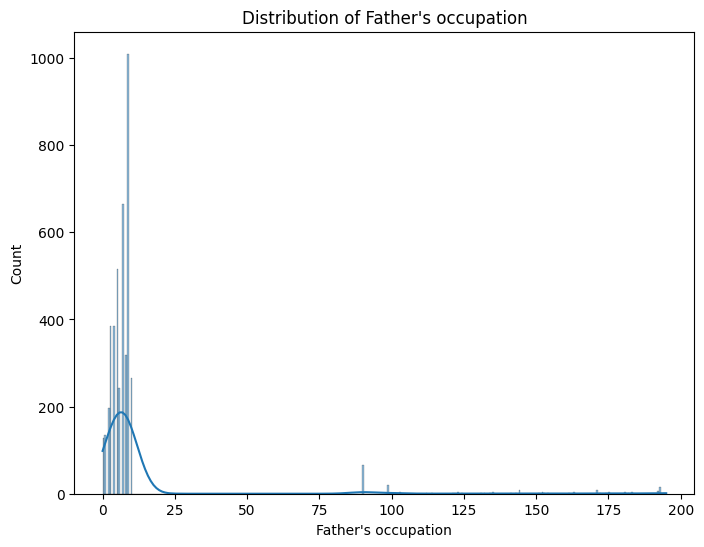

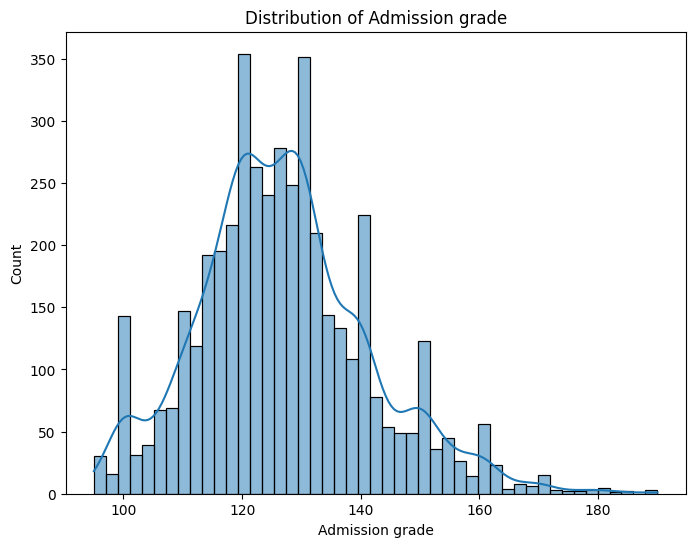

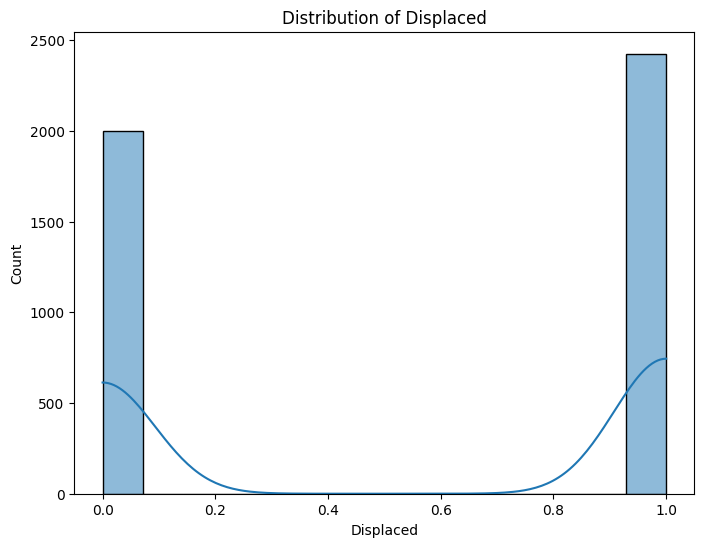

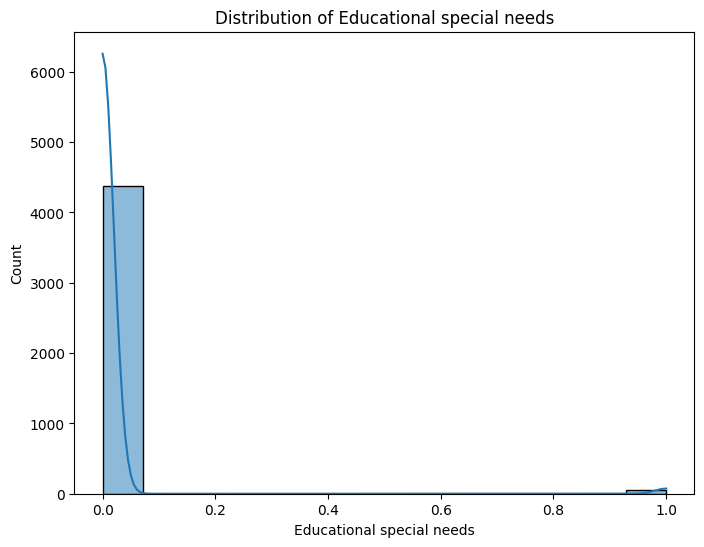

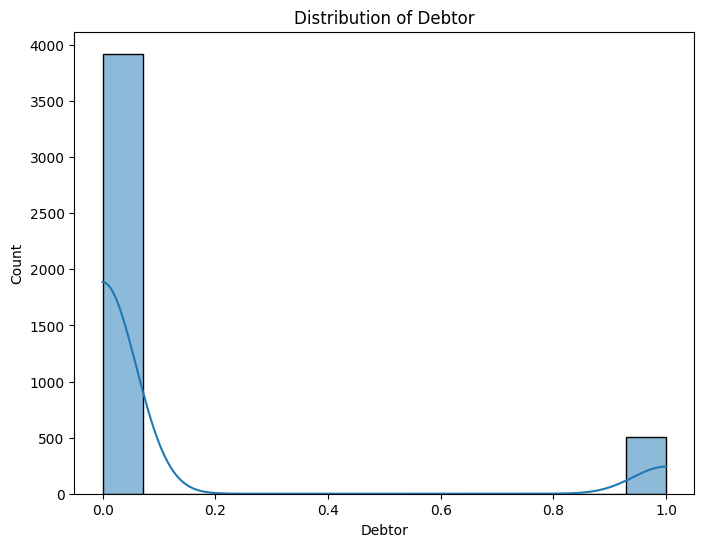

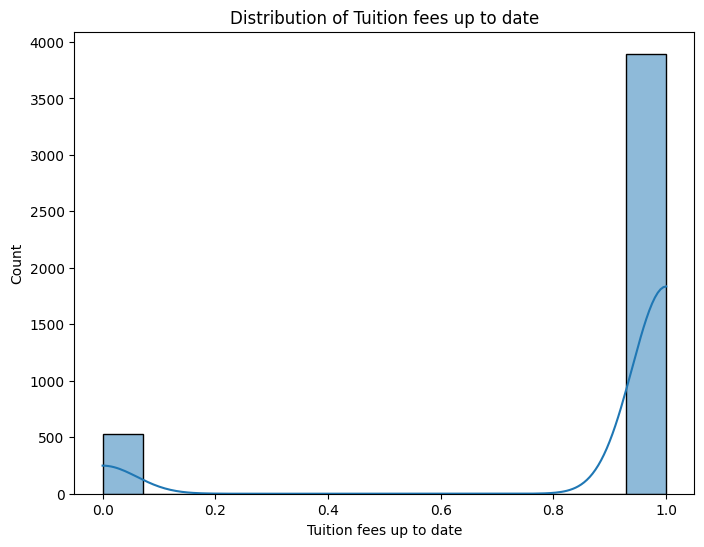

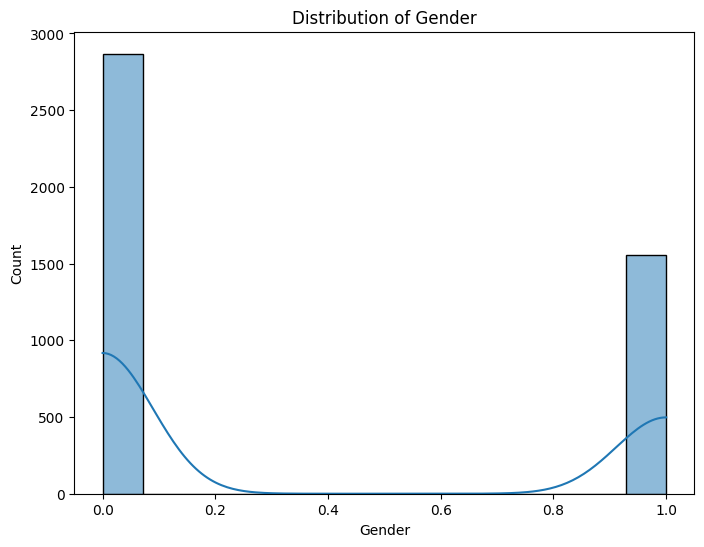

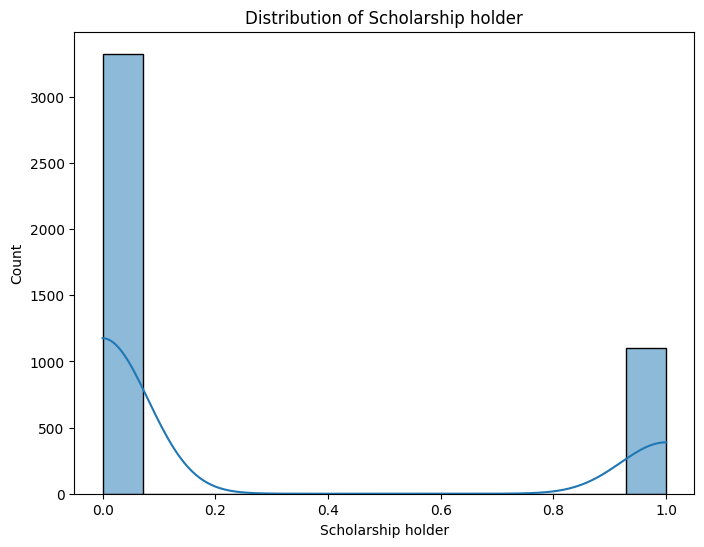

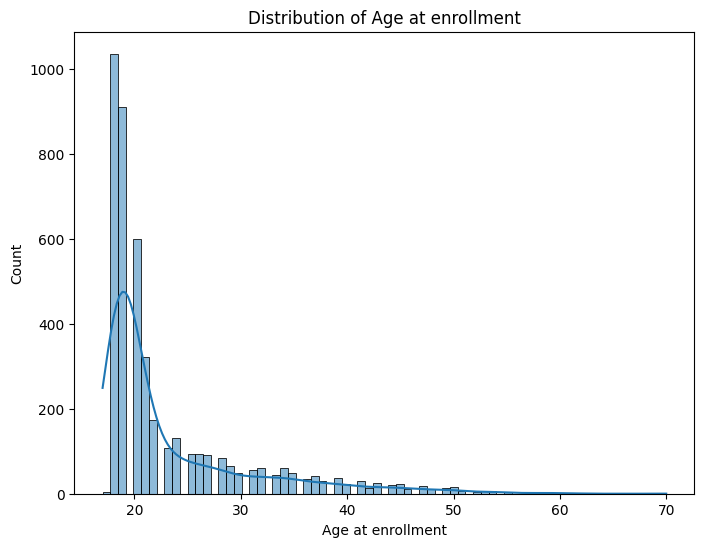

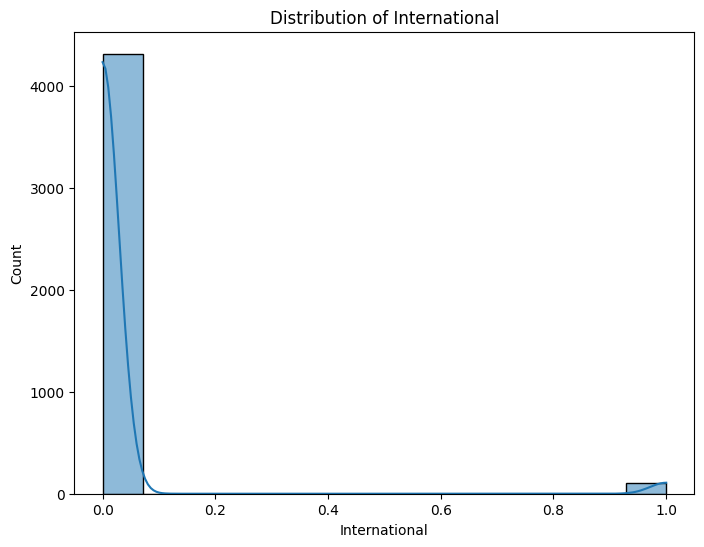

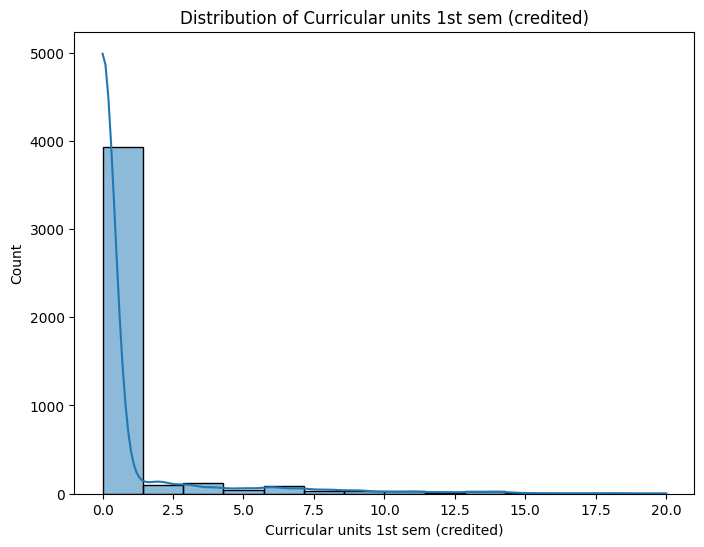

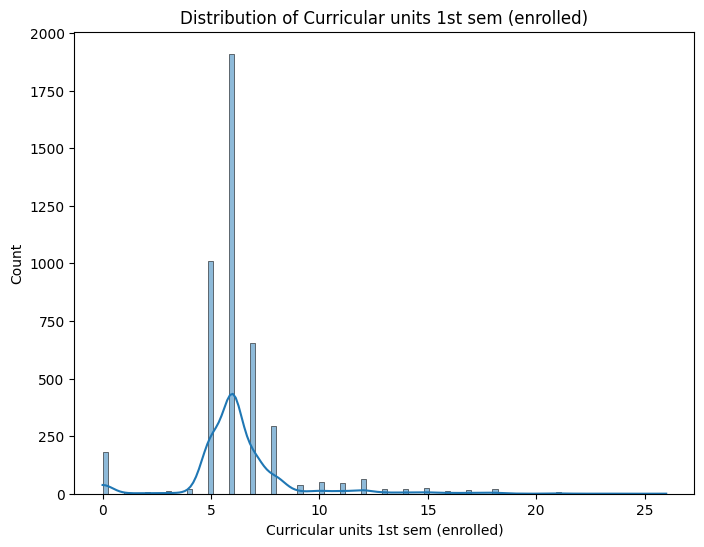

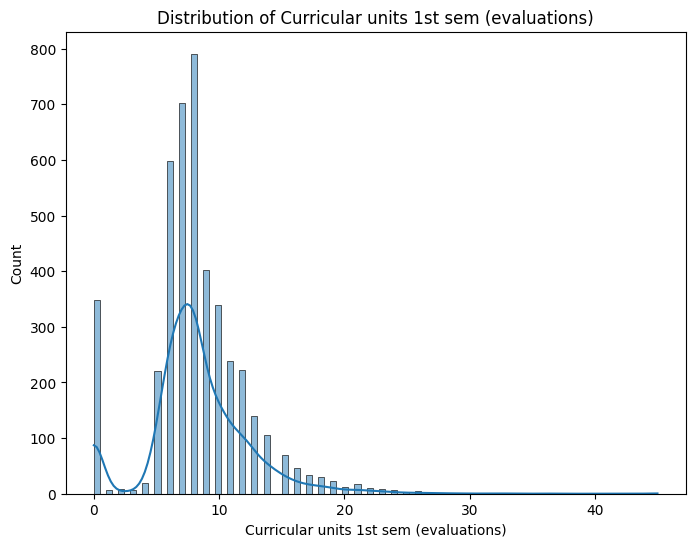

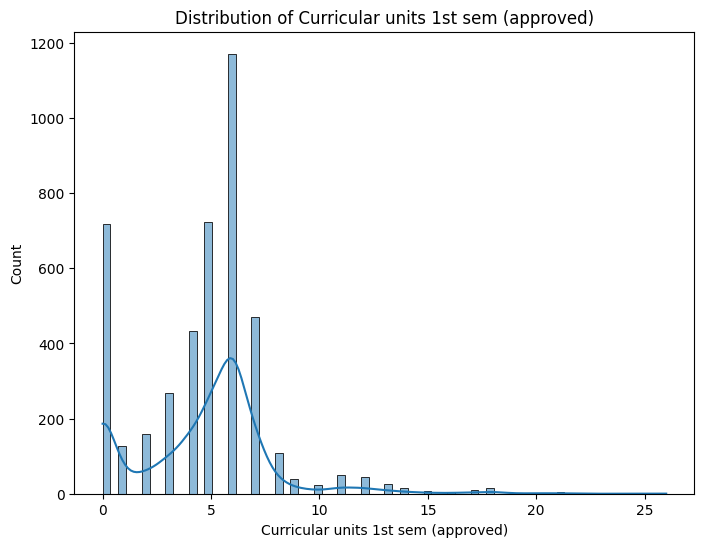

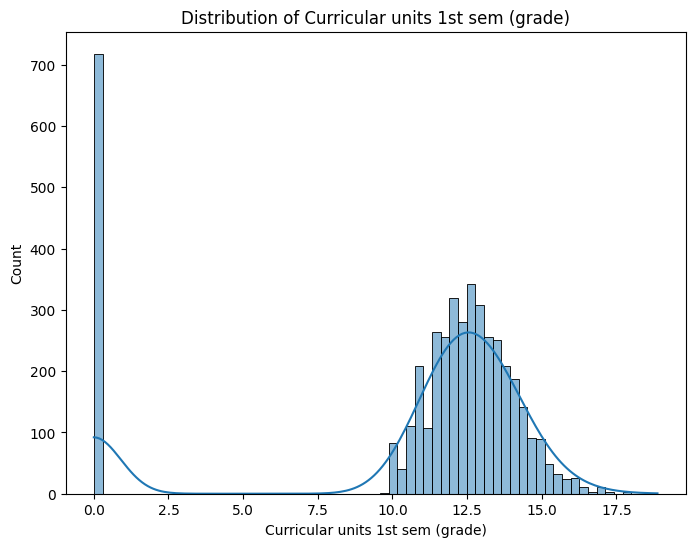

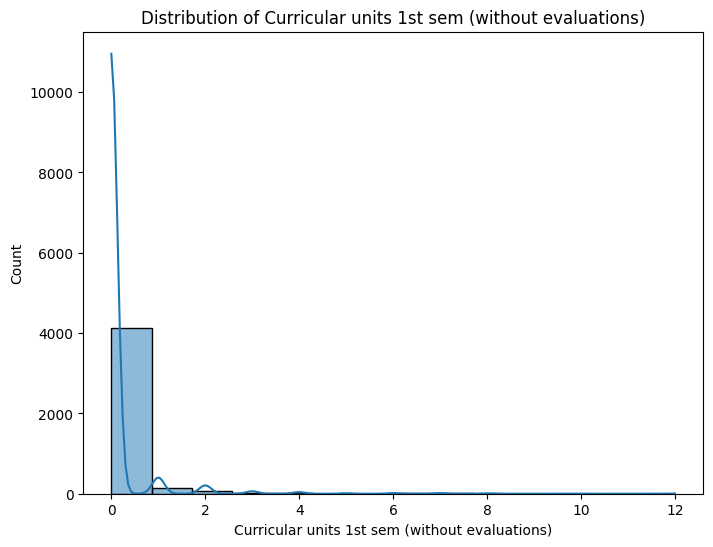

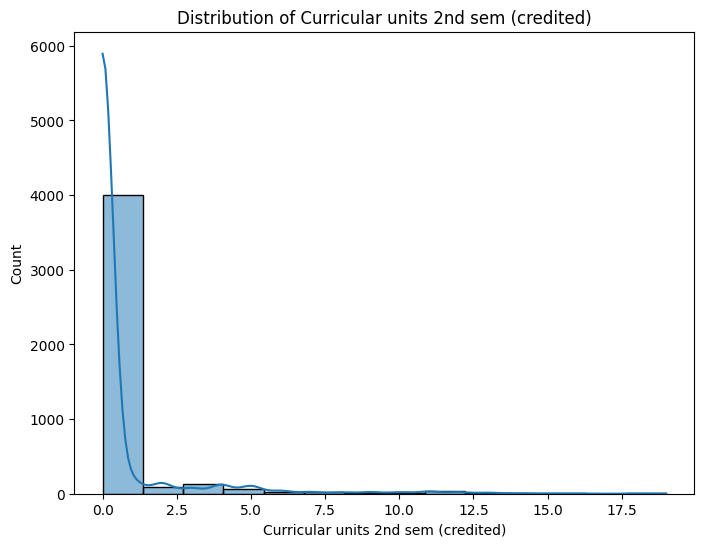

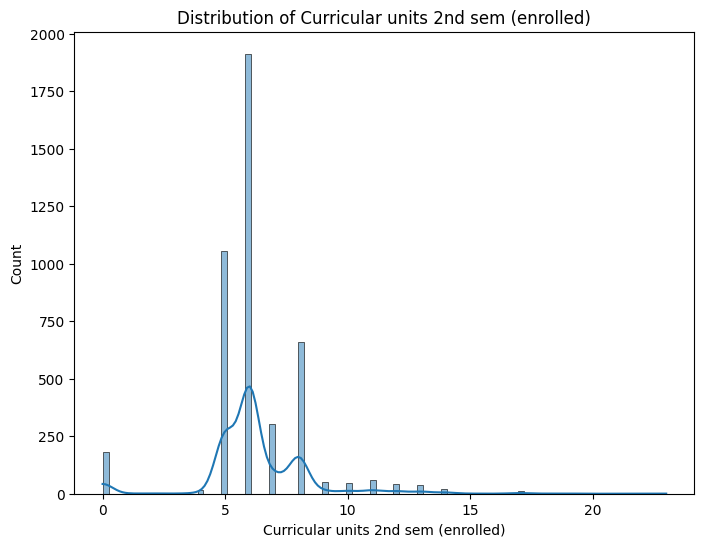

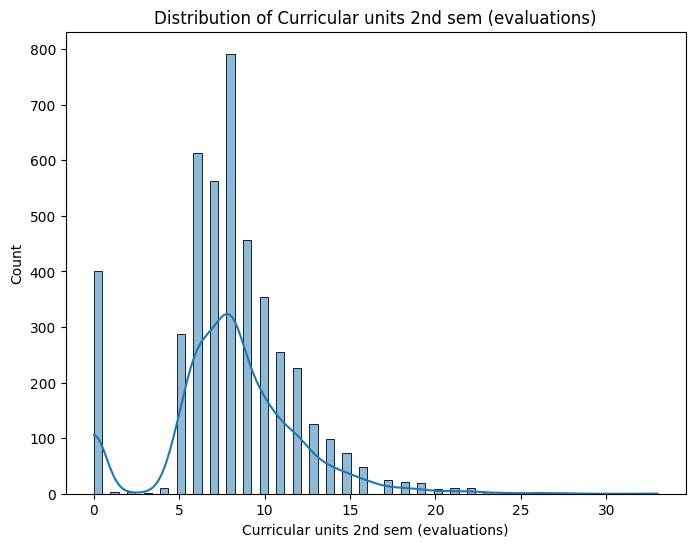

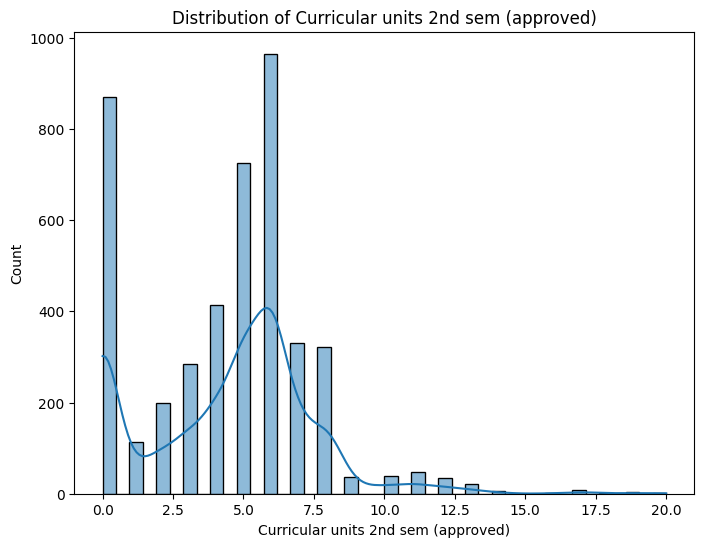

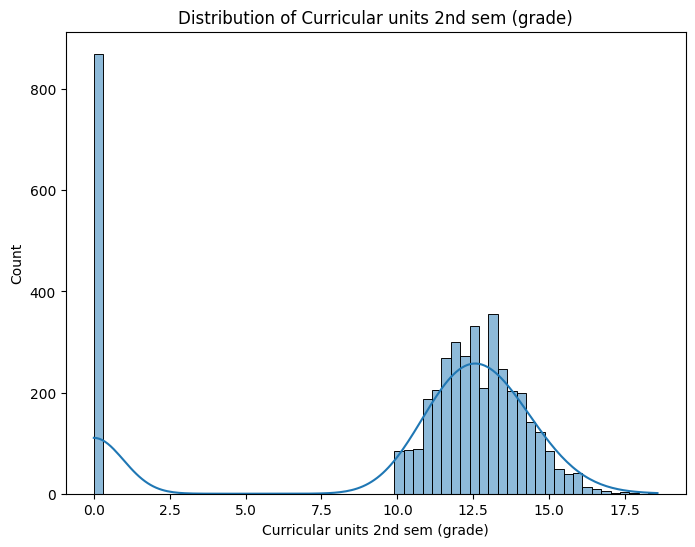

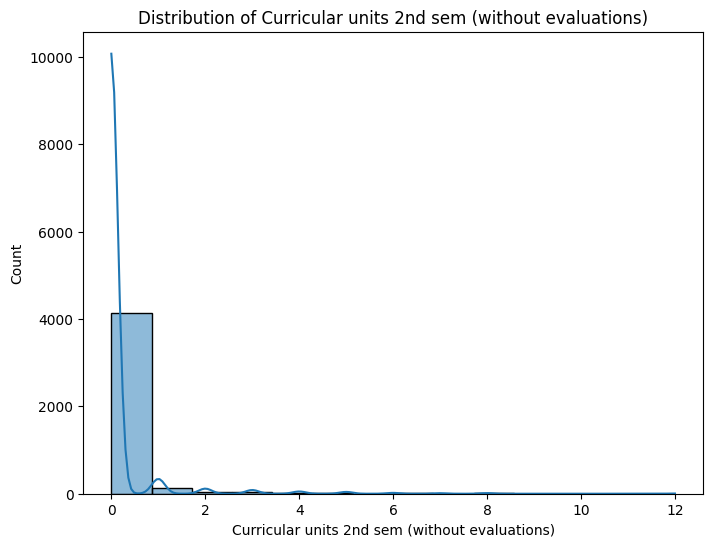

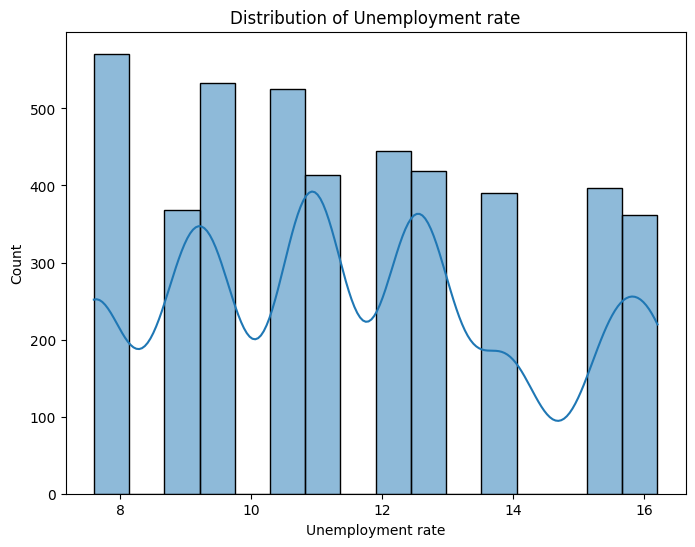

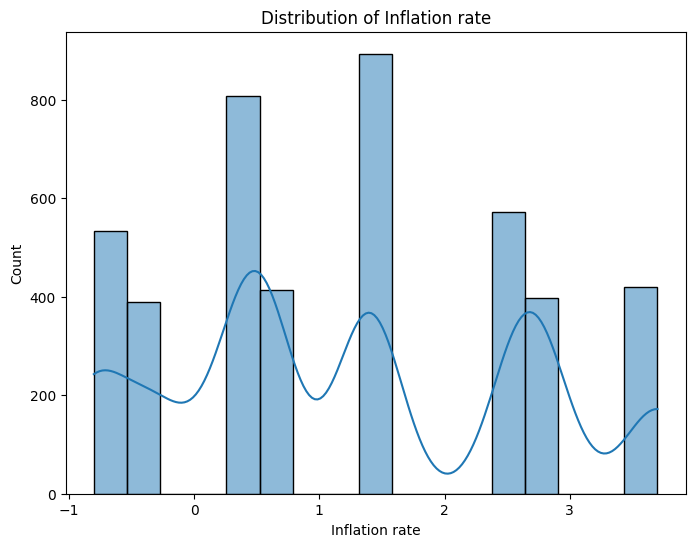

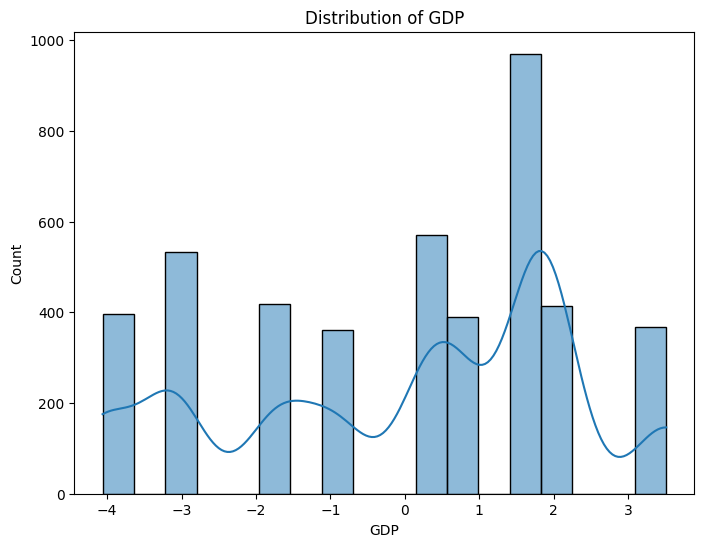

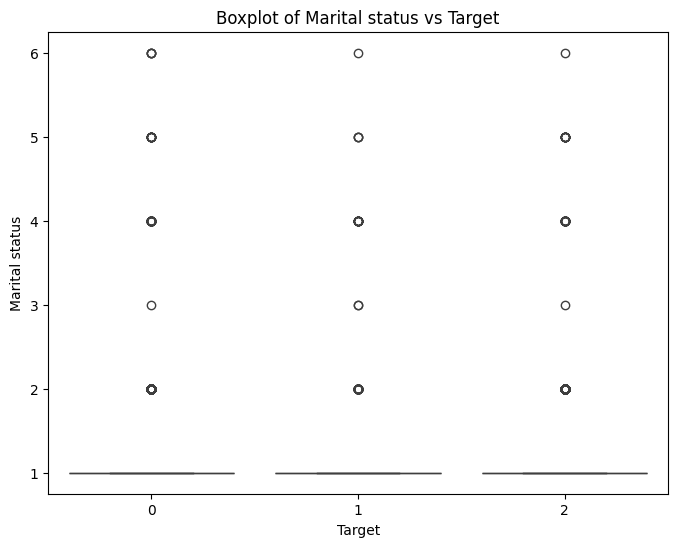

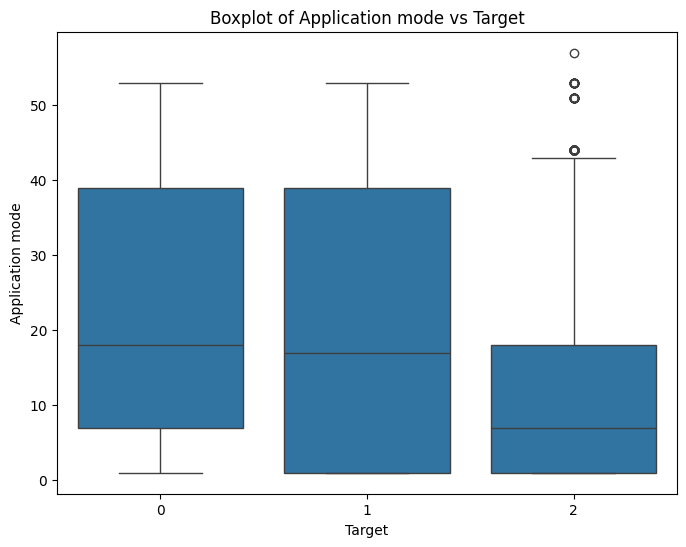

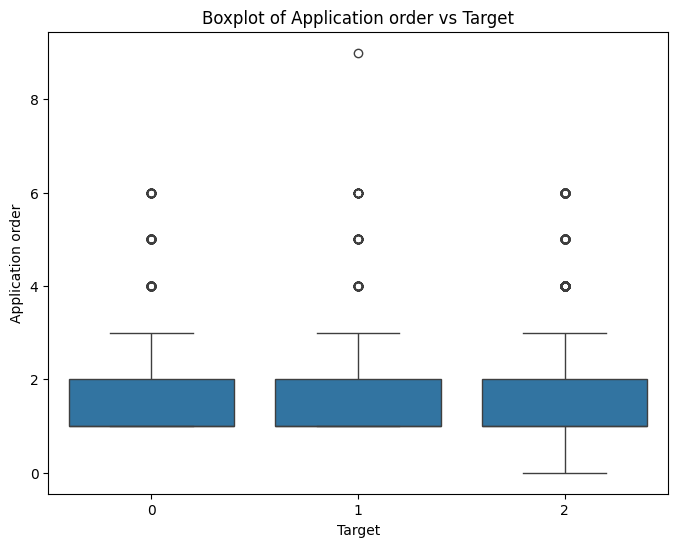

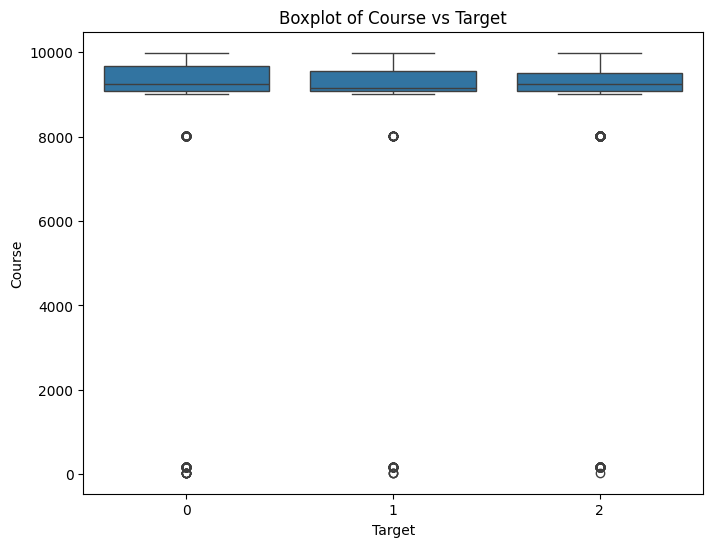

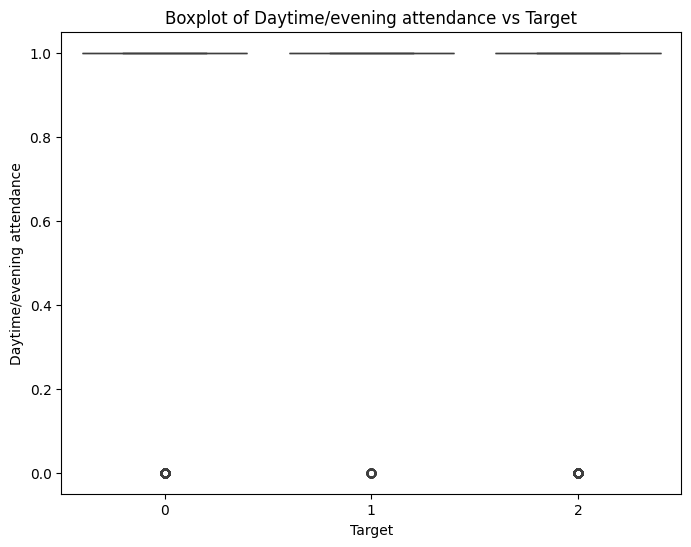

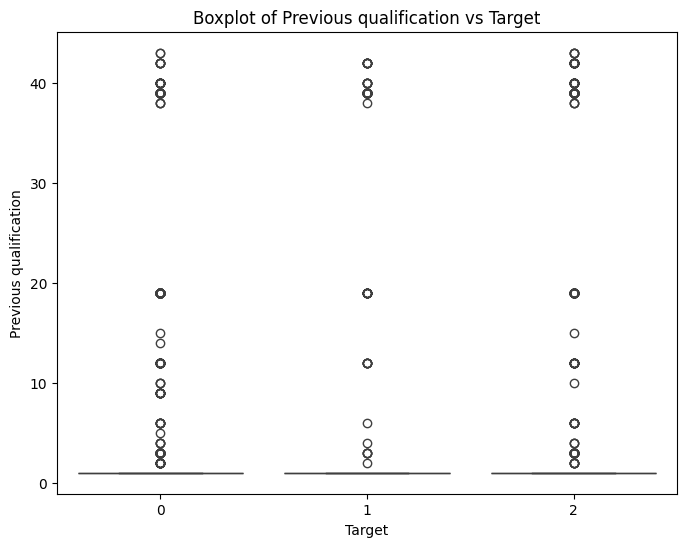

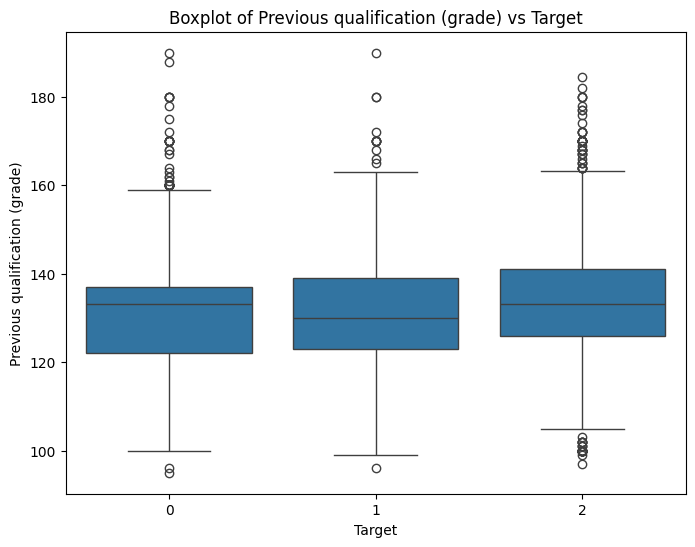

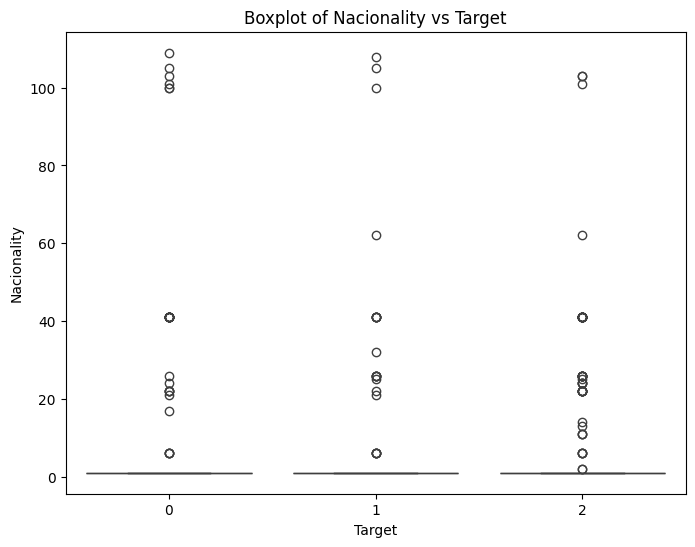

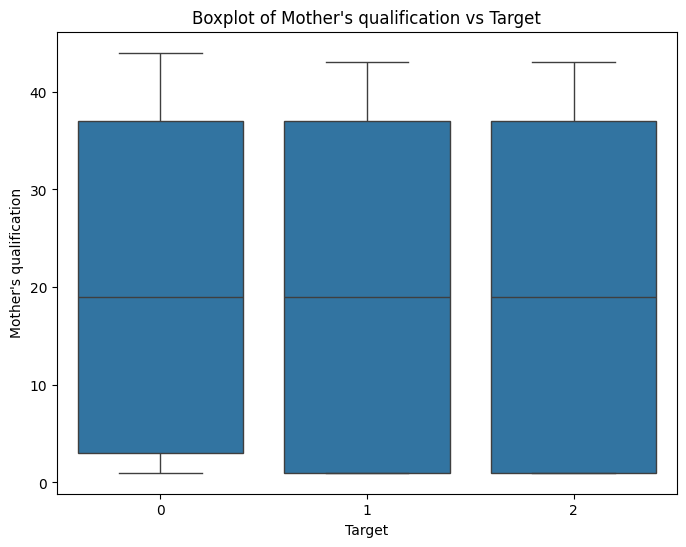

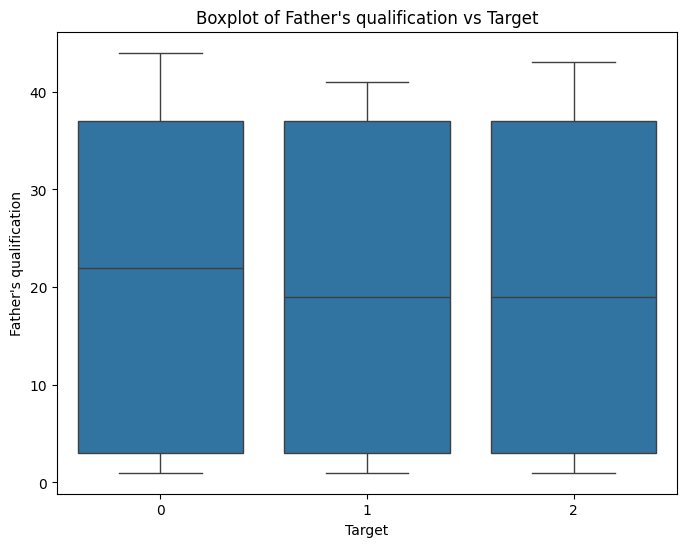

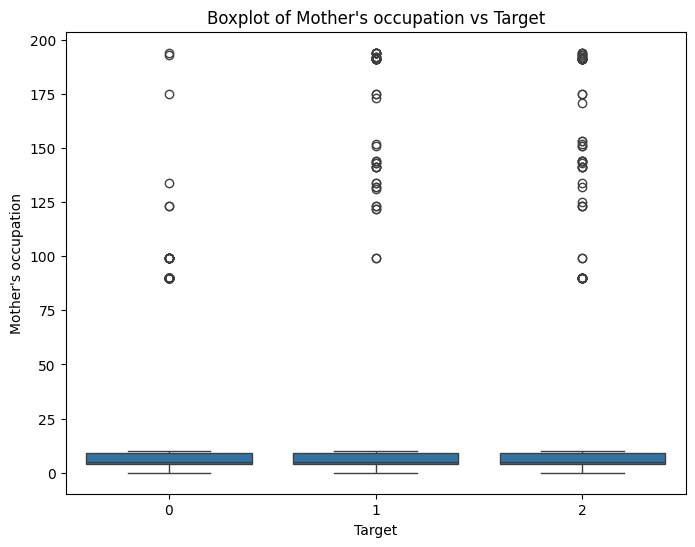

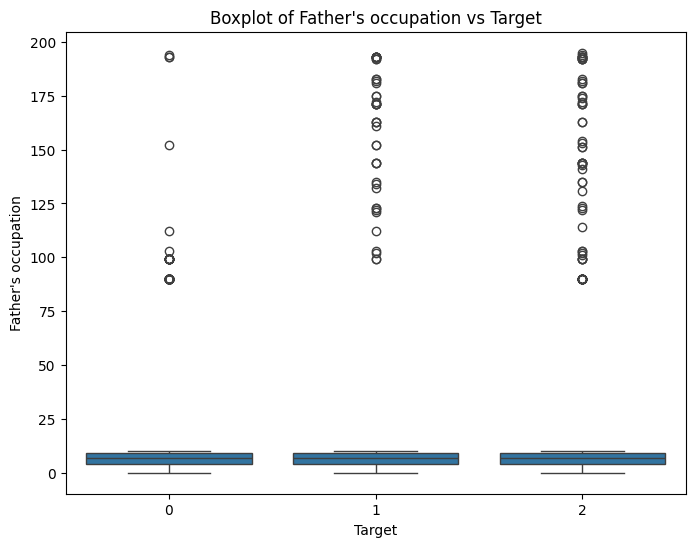

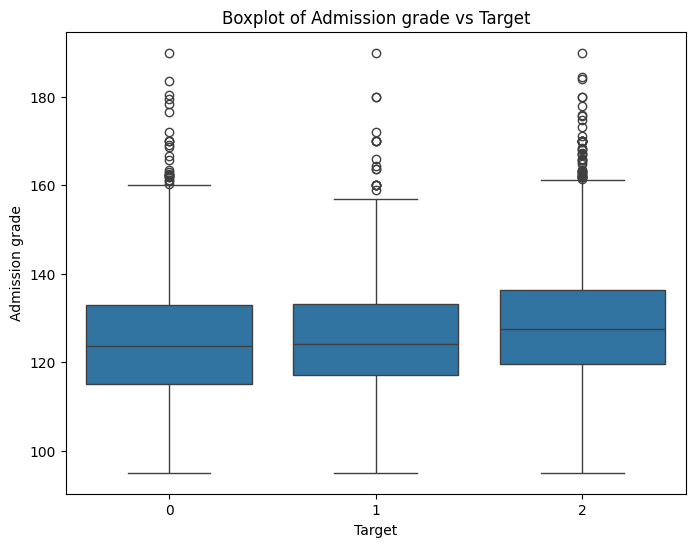

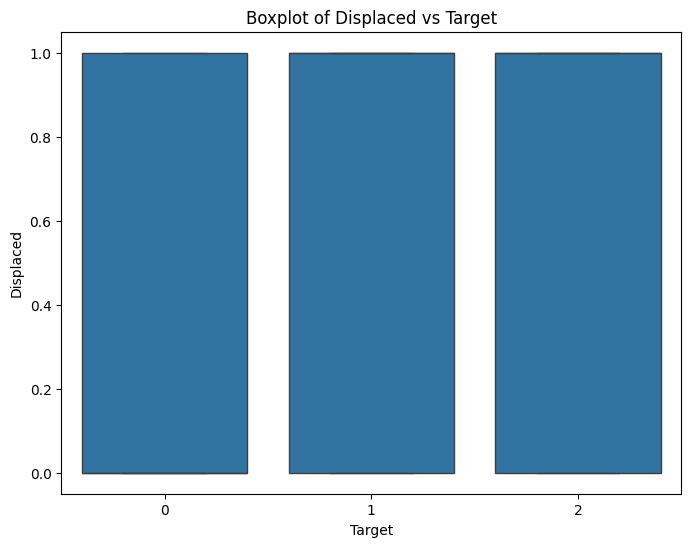

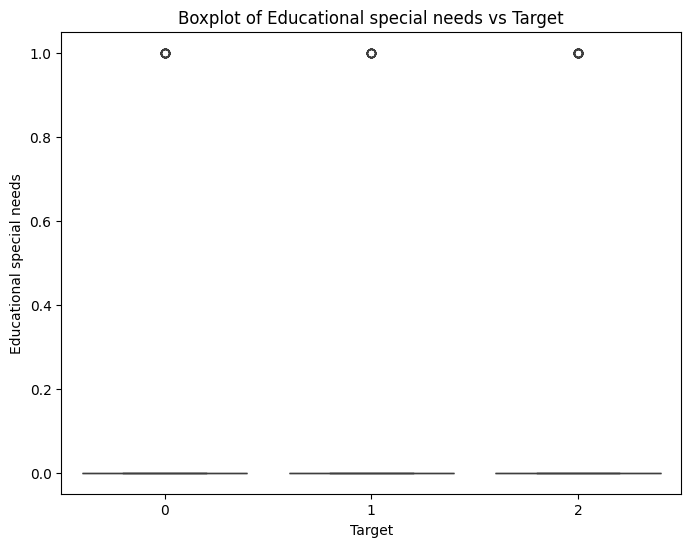

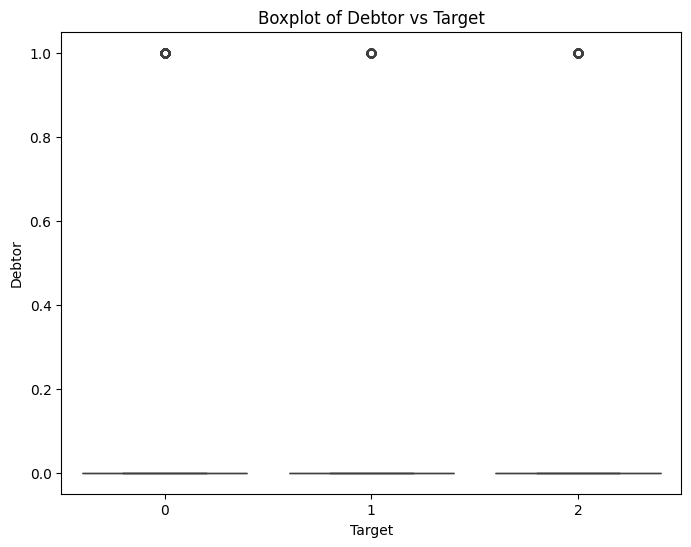

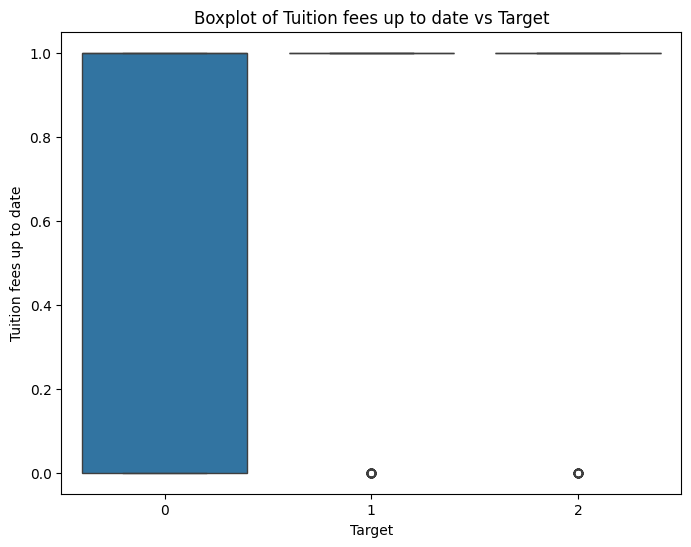

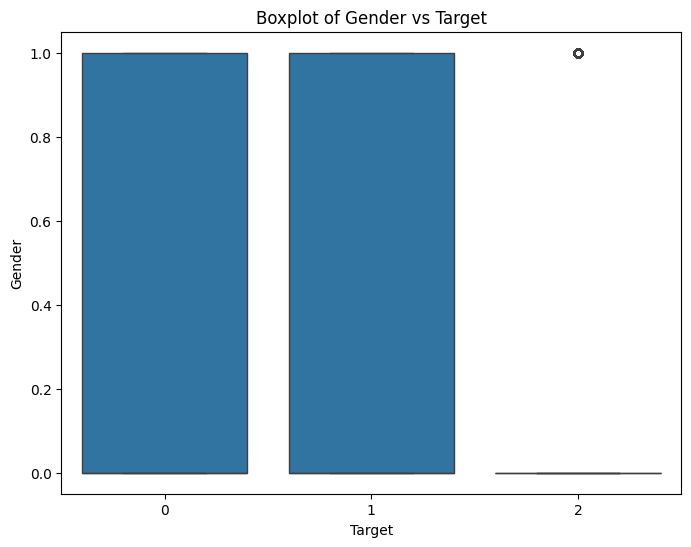

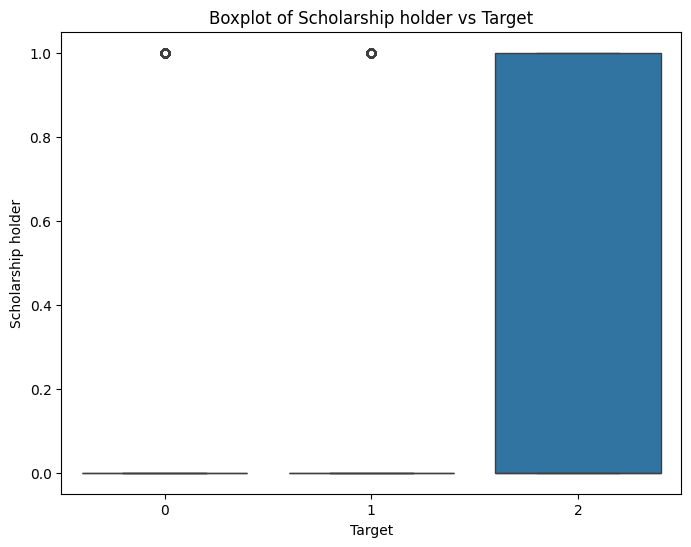

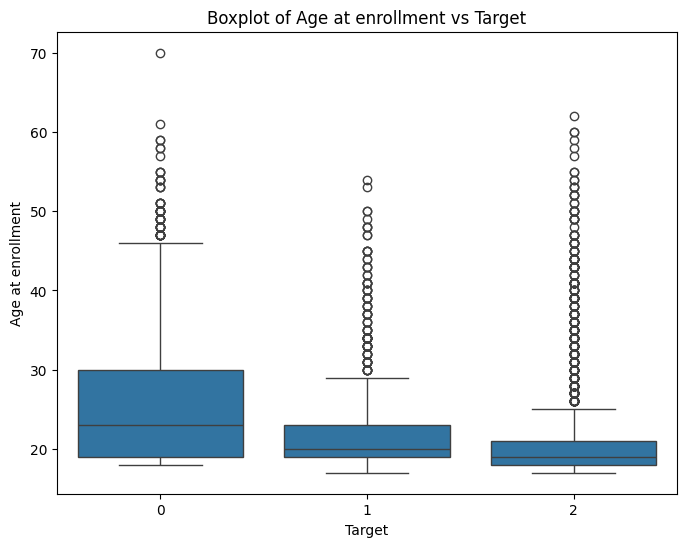

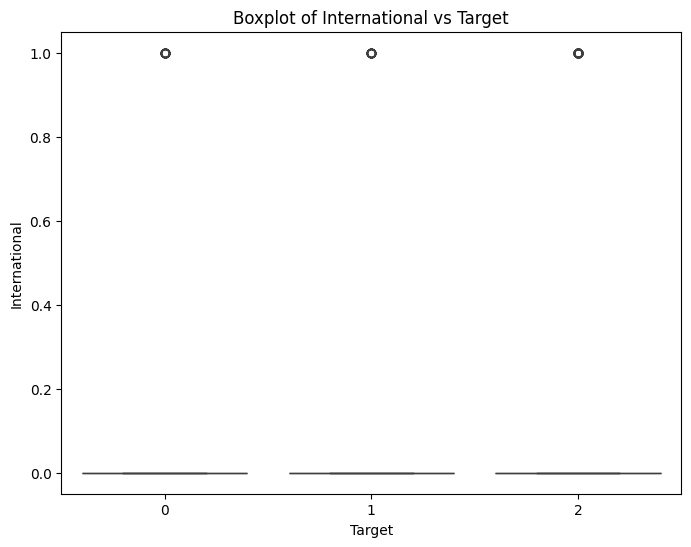

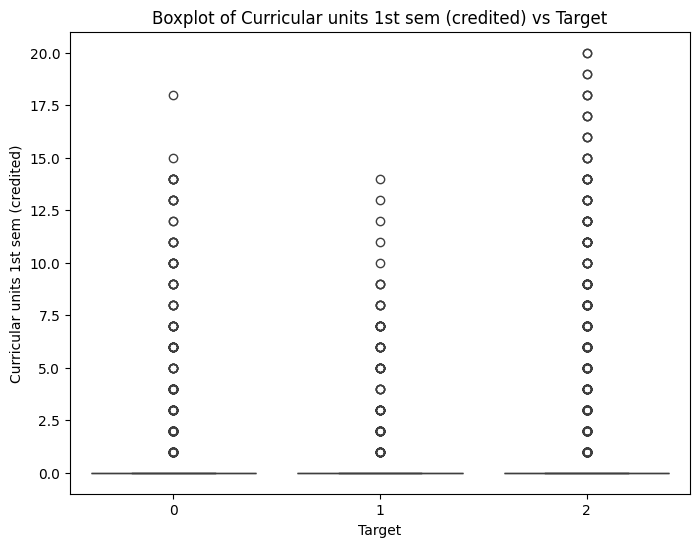

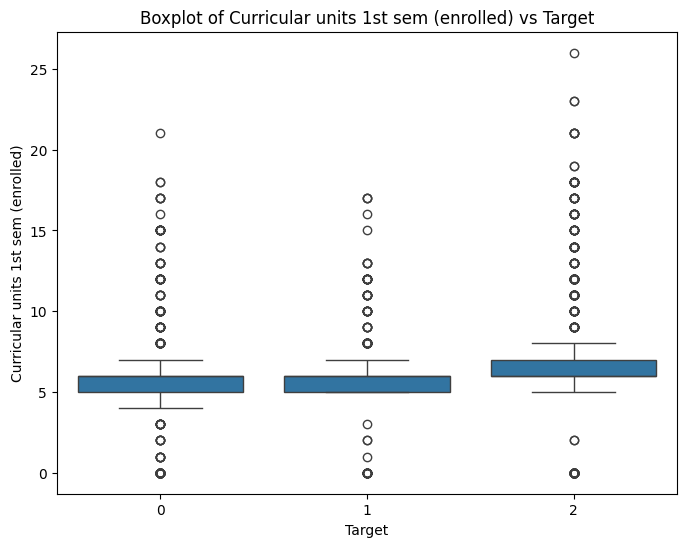

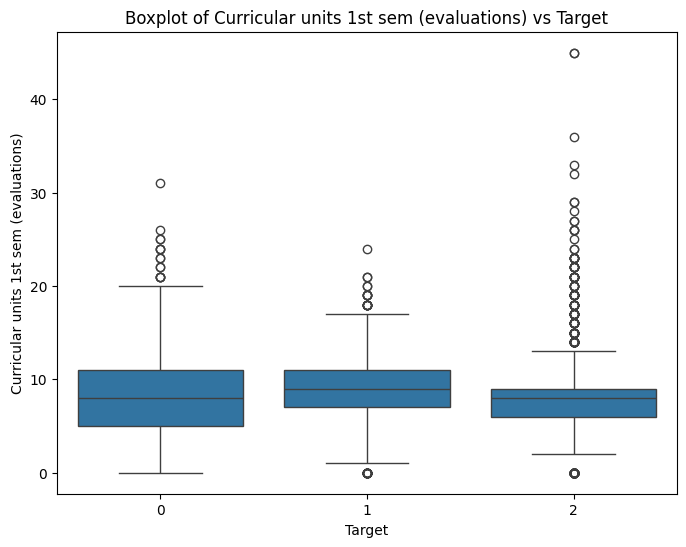

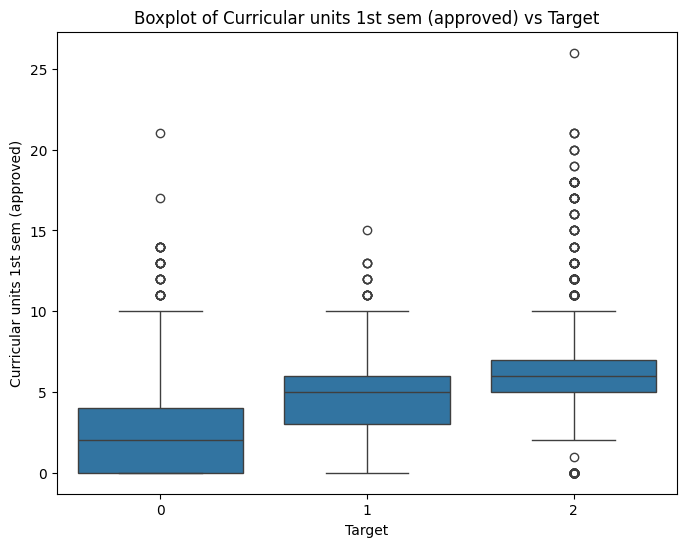

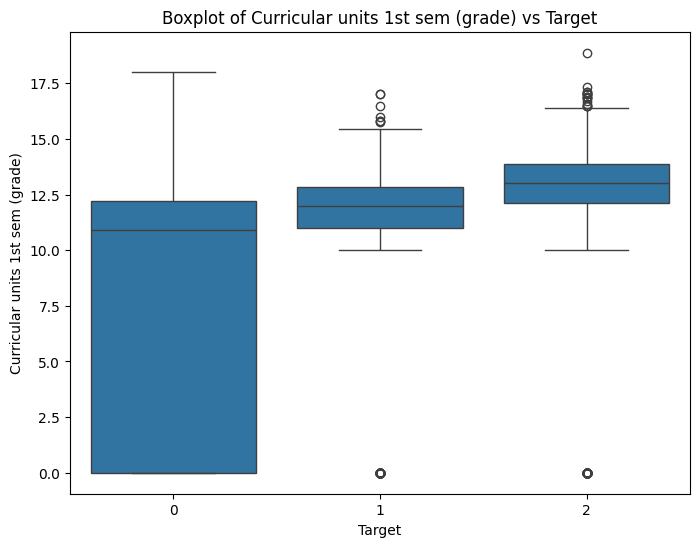

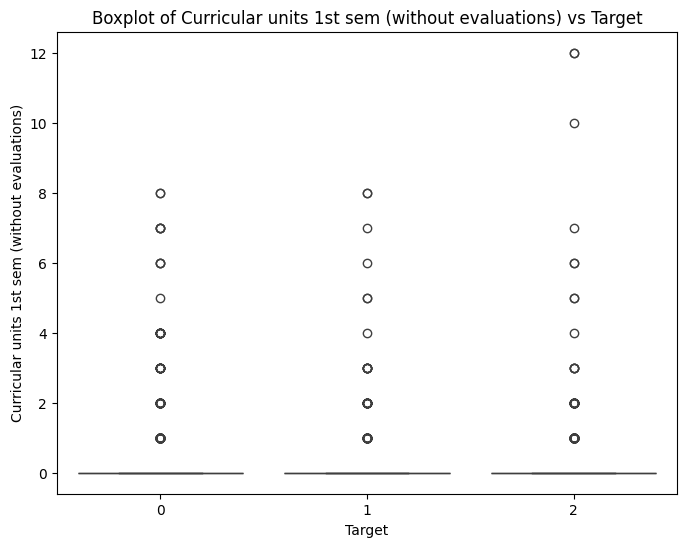

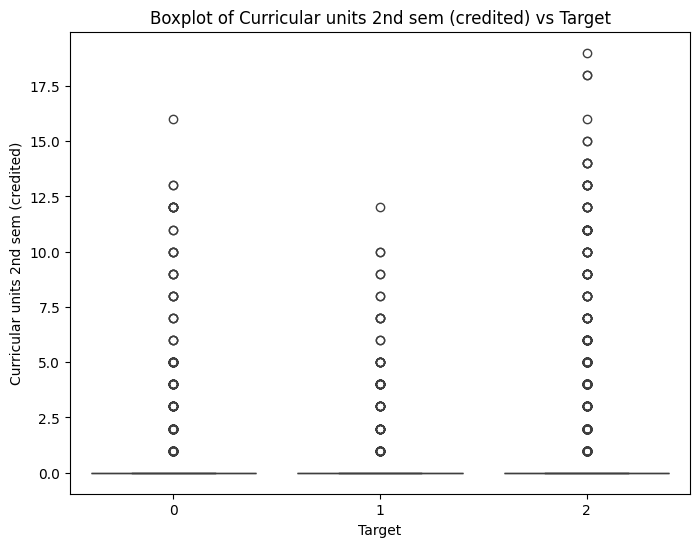

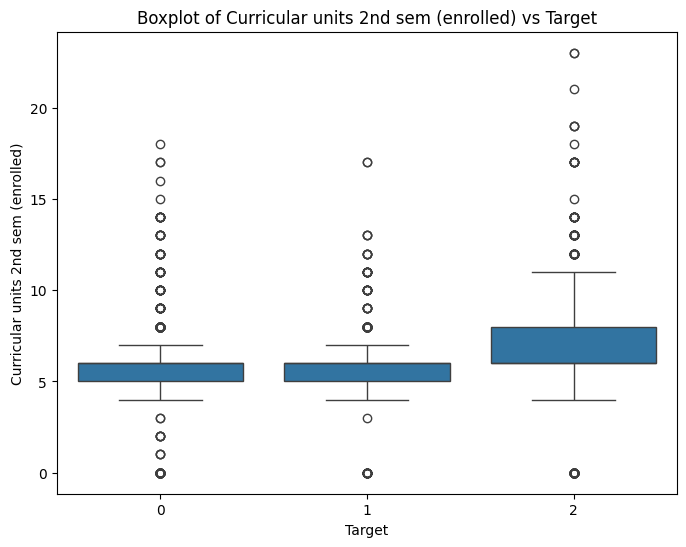

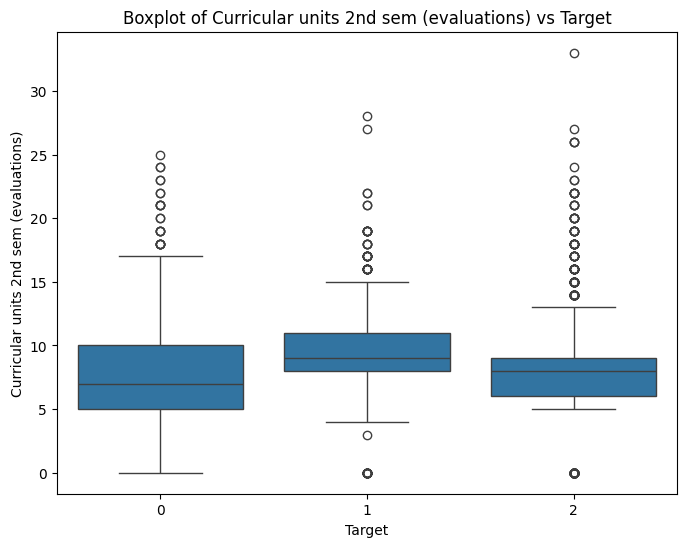

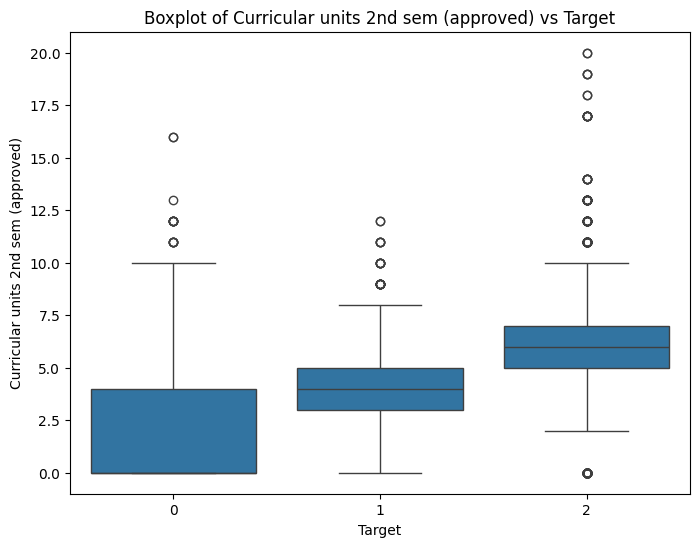

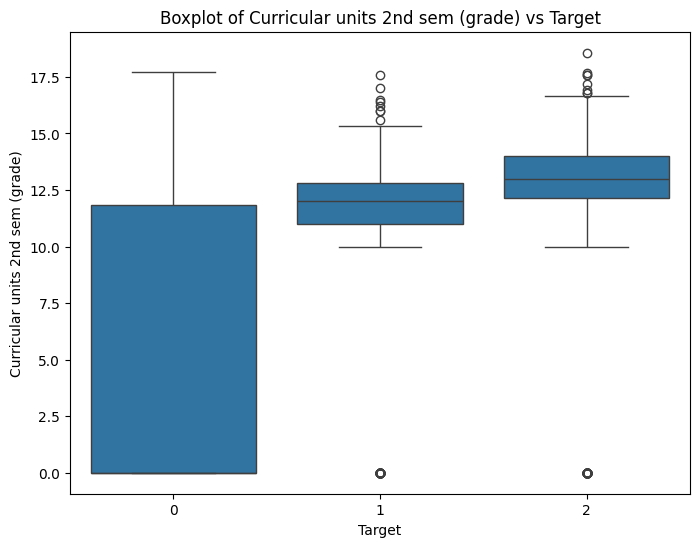

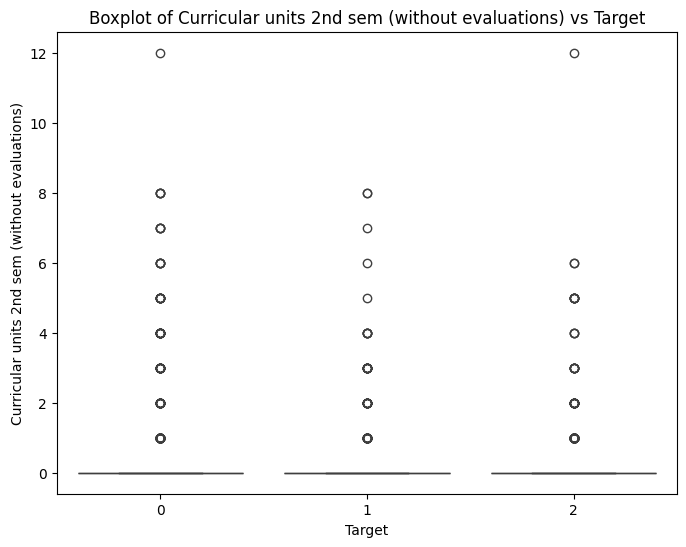

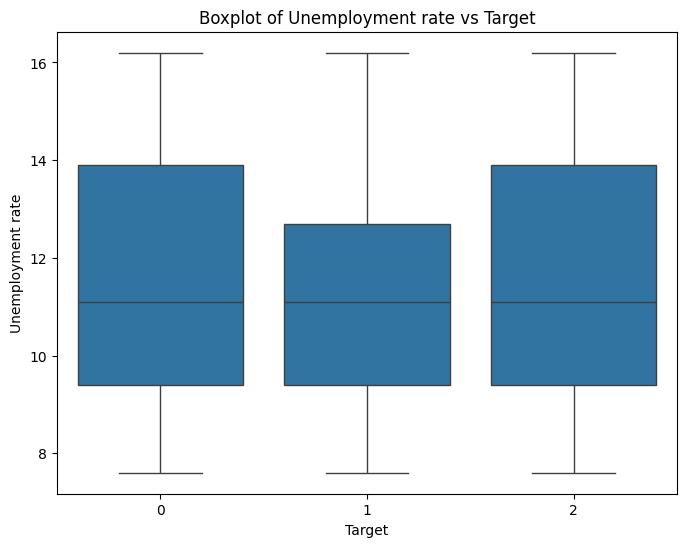

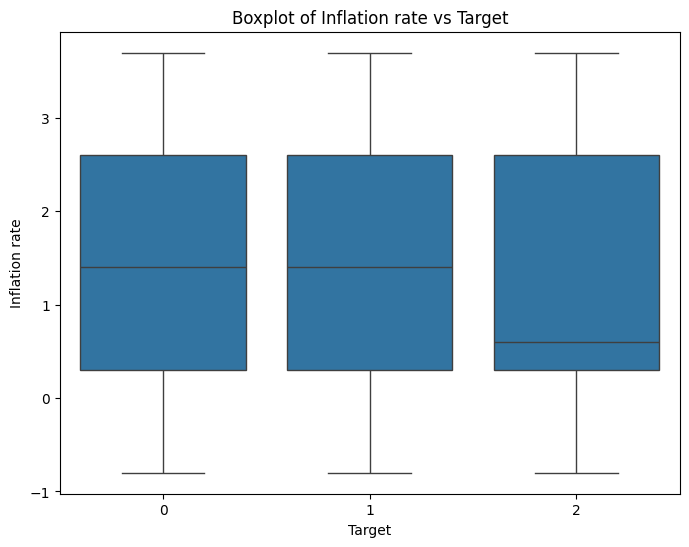

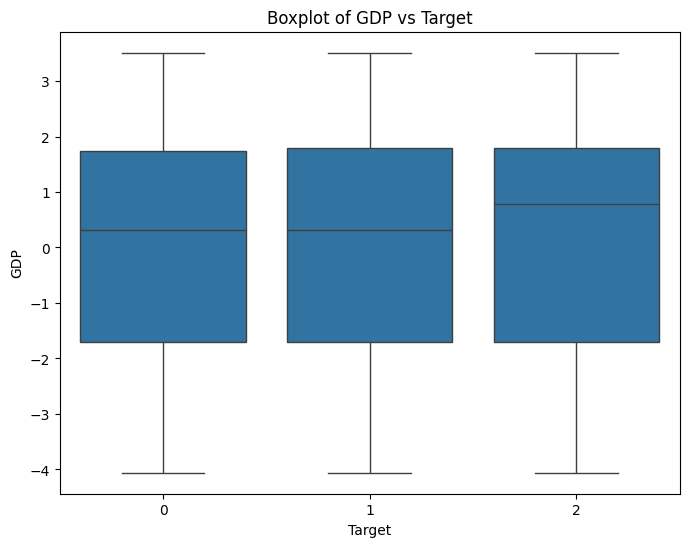

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.45      0.28      0.34       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885

[[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]


In [14]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/data.csv")

# Drop rows with null values in the 'Target' column
df.dropna(subset=['Target'], inplace=True)

# Convert 'Target' column values to 0 and 1 (assuming binary classification)
df['Target'] = df['Target'].astype('category').cat.codes  # Encode categorical values

# EDA Analysis
print(df.info())
print(df.describe())

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms for numerical features
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    if col != 'Target':
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# Boxplots for numerical features
for col in numerical_features.columns:
    if col != 'Target':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Target', y=col, data=df)
        plt.title(f'Boxplot of {col} vs Target')
        plt.show()

# Countplot for categorical features (if any)
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Classification (Logistic Regression Example)
X = df.drop('Target', axis=1)
y = df['Target']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['number']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [15]:
# prompt: using sklearn fit a classification model for the above dataset

from sklearn.ensemble import RandomForestClassifier

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       316
           1       0.49      0.29      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885

[[244  21  51]
 [ 36  44  71]
 [  9  25 384]]
